<a href="https://colab.research.google.com/github/Graviton12/CS-430-Group-Project/blob/main/cherokee_park_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Applying Models to Cherokee Park 2024 and 2021 Datasets**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# imports for data splitting and pipelines
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# imports for k means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# imports for ranfom forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# importing for apriori
from mlxtend.frequent_patterns import apriori, association_rules

# **Model 1: K-Means Clustering**

## K-Means Clustering Model to cluster data for Cherokee 2024 + 2021 data

In [ ]:
# imports for k means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/CS 430 Group Project/olmstead_dataset.xlsx", sheet_name="Olmstead_combined")

In [ ]:
data.head()

,trimble station,average_canopy_cover,canopy,understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,Cherokee1,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,2.0,0.0,3.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0
1,Cherokee2,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0
2,Cherokee3,97.40,"Oak, basswood, maple","Maple, ash",3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
3,Cherokee4,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",1.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0
4,Cherokee5,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#drop last column
data = data.iloc[:, :-1]
#drop understory
data = data.drop(columns=['understory'])
#drop trimble station
data = data.drop(columns=['trimble station'])

In [ ]:
data.head()

,average_canopy_cover,canopy,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum
0,92.98,"Walnut, maple, mulberry, locust",1.0,2.0,0.0,3.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0
1,98.18,"Cherry, hackberry, maple",4.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0
2,97.40,"Oak, basswood, maple",3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0
3,93.24,"Locust, walnut, sycamore",1.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0
4,87.00,"Oak, maple, locust",0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
numeric_data = data.select_dtypes(include=np.number)

# Create and apply the imputer
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(numeric_data)


# Update the original DataFrame with imputed values
data[numeric_data.columns] = imputed_data

In [ ]:
# drop the empty canopy rows
data = data.dropna(subset=['canopy'])

In [ ]:
# clean up function to clean up canopy column and understory column which can be appied to both 2024 and 2021 data
def clean_canopy_as_list_lowercase(entry):
    if pd.isnull(entry):
        return np.nan

    # Standardize entry to lowercase for uniform correction and cleanup
    entry = entry.lower().replace('\xa0', '').replace(',', ', ').replace(',,', ',').strip(', ')

    # Correct common misspellings and ensure uniform formatting
    corrections = {
        'haxkberry': 'hackberry',
        'havkberry': 'hackberry',
        'hackberrt': 'hackberry',
        'hackberr': 'hackberry',
        'hackberryy': 'hackbery',
        'Hackberry': 'hackberry',
        'hackberyy': 'hackberry',
        'hackbery': 'backberry',
        'backberry': 'hackberry',
        'maple, ': 'maple',
        'Maple': 'maple',
        'box elderb': 'box elder',
        'elm hickory': 'elm, hickory',
        'basswood locust red oak ash': 'basswood, locust, red oak, ash',
        'n red oak': 'red oak',
        'box elder elm hackberryv': 'box elder, elm, hackberry',
        'Tilia': 'tilia',
        'Maple hackberry tulip poplar': 'maple, hackberry, tulip poplar',
        'Tulip poplar': 'tulip poplar',
        'maple beech': 'maple, beech',
        'box elder elm': 'box elder, elm',
        'maple locust': 'maple, locust',
        'tulip poplar maple hackberry': 'tulip poplar, maple, hackberry',
        'beech tulip poplar': 'beech, tulip poplar',
        'walnut hackberry maple mulberry': 'walnut, hackberry, maple, mulberry',
        'sycamore hackberry box elder walnut': 'sycamore, hackberry, box elder, walnut',
        'maple locust': 'maple, locust',
        'maple walnut': 'maple, walnut',
        'spicebush ash saplings buckeye pawpaw': 'spicebush, ash saplings, buckeye, pawpaw',
        'redbud ash sapling poplar sapling pawpaw': 'redbud, ash sapling, poplar sapling, pawpaw',
        'pawpaw! holly spicebush mock orange': 'pawpaw, holly, spicebush, mock orange',
        'dogwood maple sapling ironwood box elder': 'dogwood, maple, sapling, ironwood, box elder',
        'ash and maple saplingscoralberry': 'ash, maple saplings, coral, berry',
        'maple buckeye': 'maple, buckeye',
        'maple ash': 'maple, ash',
        'maple hackberry': 'maple, hackberry',
        'maple hackbery': 'maple, hackberry',
        'Sycamore hackberry box elder cherry plane tree,':'sycamore, hackberry, box elder, cherry, plane tree',
        'Box elder saplings elderberry ash saplings redbud Spicebush': 'box elder saplings, elderberry, ash saplings, redbud, spicebush',
        'ash and tilia saplings': 'ash saplings, tilia saplings',
        'maple sassafrass': 'maple, sassafrass',
        'maple cherry': 'maple, cherry',
        'Redbud maple saplings Spicebush pawpaw couple ash and tulip pop saplings tiny viburnum (jap tree lilac)': 'redbud, maple saplings, spicebush, pawpaw, ash saplings, tulip pop saplings, viburnum, jap tree, lilac',
        'Walnut, red oak,box elder, carya sp, ash, mulberry,prunus sp': 'walnut, red oak, box elder, carya saplings, ash, mulberry, prunus saplings',
        'Cherry maple': 'cherry, maple',
        'Dogwood': 'dogwood'
    }
    for wrong, correct in corrections.items():
        entry = entry.replace(wrong, correct)

    # ensuring everything is lowercase
    entry = entry.lower()

    # Split by commas, remove any extra spaces, and return the cleaned list
    entry_list = [value.strip() for value in entry.split(',')]
    return entry_list

# Apply the new cleaning function with lowercase conversion to the 'canopy' column
data['canopy'] = data['canopy'].apply(clean_canopy_as_list_lowercase)


In [ ]:
data.sample(6)

,average_canopy_cover,canopy,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum
233,97.40,[cherry walnut tulip poplar beech hackberry ma...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
91,88.82,"[maple, hackberry, beech]",0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,3.0,2.0
214,94.80,[maple tulip poplar cherry beech],1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0
119,83.62,"[walnut, ash, hickory, serviceberry, maple]",2.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,2.0,0.0
182,99.48,"[maple, hackberry tulip poplar]",1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1.0,2.0,0.0
142,90.64,"[hackberry, walnut, basswood]",1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0


In [ ]:
# Explode the 'canopy' column so each item in the list becomes its own row
exploded_data = data.explode('canopy')

# One-hot encode using pd.crosstab
canopy_crosstab = pd.crosstab(index=exploded_data.index, columns=exploded_data['canopy'])

# Merge the one-hot encoded data back with the original DataFrame
olmstead_encoded = pd.concat([data.drop(columns=['canopy']), canopy_crosstab], axis=1)

In [ ]:
olmstead_encoded.tail()

,average_canopy_cover,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,...,walnut tulip poplar white oaks,walnutash,white,white mulberry,white oak,white pine,willow oak,yellow wood,yellowwood,young tulip poplar
306,81.28,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
307,68.02,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
308,74.78,4.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
309,77.64,2.0,0.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
310,84.14,2.0,1.0,1.0,4.0,4.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler = StandardScaler()
olmstead_scaled = scaler.fit_transform(olmstead_encoded)

In [ ]:
olmstead_scaled = pd.DataFrame(olmstead_scaled, columns=olmstead_encoded.columns)
olmstead_scaled.head()

,average_canopy_cover,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,...,walnut tulip poplar white oaks,walnutash,white,white mulberry,white oak,white pine,willow oak,yellow wood,yellowwood,young tulip poplar
0,0.297916,-0.247319,1.601969,-0.332236,1.264736,-0.232642,3.888390,-0.271213,0.243805,-0.182868,...,-0.056796,-0.056796,-0.114146,-0.098693,-0.080452,-0.056796,-0.056796,-0.056796,-0.080452,-0.056796
1,0.736418,2.199558,-0.538593,1.648403,-0.251969,-0.232642,-0.510883,-0.271213,0.984780,-0.182868,...,-0.056796,-0.056796,-0.114146,-0.098693,-0.080452,-0.056796,-0.056796,-0.056796,-0.080452,-0.056796
2,0.670642,1.383933,-0.538593,-0.332236,-1.010321,-0.232642,-0.510883,-0.271213,0.243805,-0.182868,...,-0.056796,-0.056796,-0.114146,-0.098693,-0.080452,-0.056796,-0.056796,-0.056796,-0.080452,-0.056796
3,0.319841,-0.247319,0.531688,-0.332236,2.023088,-0.232642,-0.510883,-0.271213,0.984780,-0.182868,...,-0.056796,-0.056796,-0.114146,-0.098693,-0.080452,-0.056796,-0.056796,-0.056796,-0.080452,-0.056796
4,-0.206361,-1.062944,-0.538593,-0.332236,0.506384,-0.232642,-0.510883,-0.271213,0.984780,-0.182868,...,-0.056796,-0.056796,-0.114146,-0.098693,-0.080452,-0.056796,-0.056796,-0.056796,-0.080452,-0.056796


In [ ]:
# creating a kmeans pipeline olmstead_encoded
kmeans_pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=12, random_state=42))
])

# Fit and get the cluster labels
kmeans_labels = kmeans_pipeline.named_steps['kmeans'].fit_predict(olmstead_scaled)


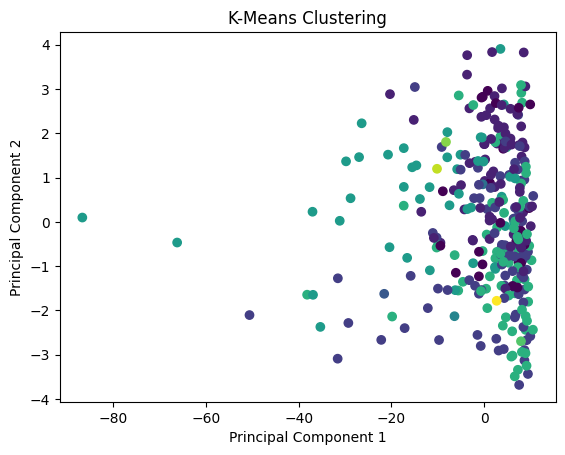

In [ ]:
#visual using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(olmstead_encoded)

# Now use kmeans_labels (which holds the cluster assignments) for coloring the scatter plot
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()

In [ ]:
#silhoutte score
kmeans_score = silhouette_score(olmstead_scaled, kmeans_labels)
print(f"Silhouette Score for K-Means: {kmeans_score}")

Silhouette Score for K-Means: -0.04687737246404299


In [ ]:
#adding a column for cluster into the data
olmstead_encoded['cluster'] = kmeans_labels

In [ ]:
olmstead_encoded.head()

,average_canopy_cover,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,...,walnutash,white,white mulberry,white oak,white pine,willow oak,yellow wood,yellowwood,young tulip poplar,cluster
0,92.98,1.0,2.0,0.0,3.0,0.0,4.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,7
1,98.18,4.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,97.40,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,93.24,1.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,2
4,87.00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


INTERPRET

# **Model 2: Random Forest Regressor**

## Using Random forest regressor to predict invaseness species sum for Cherokee 2024 + 2021 data

In [ ]:
# imports for ranfom forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#creating a column 'invasive_species_sum' based on summing columns 2-16
olmstead_encoded['invasive_species_sum'] = olmstead_encoded.iloc[:, 1:17].sum(axis=1)

In [ ]:
olmstead_encoded.head()

,average_canopy_cover,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,...,white,white mulberry,white oak,white pine,willow oak,yellow wood,yellowwood,young tulip poplar,cluster,invasive_species_sum
0,92.98,1.0,2.0,0.0,3.0,0.0,4.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,7,20.0
1,98.18,4.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,1,15.0
2,97.40,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0,0,0,0,0,0,0,0,1,10.0
3,93.24,1.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,2,17.0
4,87.00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,...,0,0,0,0,0,0,0,0,1,7.0


In [ ]:
olmstead_encoded.iloc[:,1:17]

,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,,ailanthus
0,1.0,2.0,0.0,3.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0,0
1,4.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0,0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0,0
3,1.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0,0,0
4,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,4.0,0.0,0,0
307,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0
308,4.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,2.0,0,0
309,2.0,0.0,1.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0,1


In [ ]:
#splitting the data
X = olmstead_encoded.drop(['cluster', 'invasive_species_sum'], axis=1)
y = olmstead_encoded['invasive_species_sum']

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#random forest pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='mean')),
    ('rf', RandomForestRegressor(random_state=42))
])

In [ ]:
#fitting pipeline
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer()),
                ('rf', RandomForestRegressor(random_state=42))])

In [ ]:
#ypred
y_pred = rf_pipeline.predict(X_test)

In [ ]:
#evaluating model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.960147194258626
R-squared: 0.7329379279955239


In [ ]:
# looking at mean squared error for test
mse = mean_squared_error(y_test, y_pred)
# looking at root mean squared error for test
rmse = np.sqrt(mse)
# looking at r-squared
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 5.960147194258626
Root Mean Squared Error: 2.4413412695194063
R-squared: 0.7329379279955239


INTERPRET

# **Model 3: Apriori Model**

## Version 1: Using Apriori algorithm to find associations between the most common species in the canopy and the understory for Cherokee 2024 data only

In [ ]:
# importing for apriori
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
apriori_data=pd.read_excel("/content/drive/MyDrive/CS 430 Group Project/olmstead_dataset.xlsx", sheet_name="2024 Cherokee Invasive Survey", skiprows=1)

# renaming columns
apriori_data = apriori_data.rename(columns={'Comment':'Trimble_station', 'Calculated using formula in densiometer.1':'average_canopy_cover', 'Calculated using formula in densiometer':'form_densiometer'})

# Removing the word 'Cherokee' from the Trimble station entries that wya it is left with just its number
apriori_data['Trimble_station'] = apriori_data['Trimble_station'].str.replace('Cherokee', '')

# deleting uneeded columns
apriori_data = apriori_data.drop(['Unnamed: 27', 'N', 'E', 'S', 'W', 'Canopy gap and/or downed trees present', 'Dioscorea polystachya'], axis=1)

# filling in missing values for form_densiomter and average canopy cover with mean
apriori_data['form_densiometer'].fillna(apriori_data['form_densiometer'].mean(), inplace=True)
apriori_data['average_canopy_cover'].fillna(apriori_data['average_canopy_cover'].mean(), inplace=True)

#filling out missing values for all columns with 0
apriori_data.fillna(0, inplace=True)


In [ ]:
apriori_data.head()

,Trimble_station,form_densiometer,average_canopy_cover,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,SUM
0,1,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,20
1,2,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,0.0,1.0,1.0,0.0,...,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,15
2,3,2.60,97.40,"Oak, basswood, maple","Maple, ash",3.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,10
3,4,6.76,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",1.0,1.0,0.0,4.0,0.0,...,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,19
4,5,13.00,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",0.0,0.0,0.0,2.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7


In [ ]:
# Removing the word 'Cherokee' from the Trimble station entries that way it is left with just its number
apriori_data['Trimble_station'] = apriori_data['Trimble_station'].str.replace('Cherokee', '')

In [ ]:
apriori_data.head()

,Trimble_station,form_densiometer,average_canopy_cover,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,SUM
0,1,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,20
1,2,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,0.0,1.0,1.0,0.0,...,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,15
2,3,2.60,97.40,"Oak, basswood, maple","Maple, ash",3.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,10
3,4,6.76,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",1.0,1.0,0.0,4.0,0.0,...,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,19
4,5,13.00,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",0.0,0.0,0.0,2.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7


In [ ]:
apriori_data.columns

Index(['Trimble_station', 'form_densiometer', 'average_canopy_cover', 'Canopy',
       'Understory', 'Lonicera japonica', 'Microstegium vimineum',
       'Euonymus alatus', 'Ampelopsis brevipedunculata', 'Morus alba',
       'Celastrus orbiculatus', 'Vinca minor', 'Euonymus fortunei',
       'Akebia quinata', 'Fallopia japonica', 'Achyranthes', 'Hederea helix',
       'L. maackii', 'Privet/ Ligustrum', 'Ailanthus', 'SUM'],
      dtype='object')

In [ ]:
#drop all columns except canopy and trimble station
apriori_data = apriori_data.drop(columns=['average_canopy_cover', 'form_densiometer',
       'Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus',
       'Ampelopsis brevipedunculata', 'Morus alba', 'Celastrus orbiculatus',
       'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
       'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii',
       'Privet/ Ligustrum', 'Ailanthus','SUM'])

In [ ]:
apriori_data.head()

,Trimble_station,Canopy,Understory
0,1,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry"
1,2,"Cherry, hackberry, maple","Maple, buckeye, locust"
2,3,"Oak, basswood, maple","Maple, ash"
3,4,"Locust, walnut, sycamore","Ash, hackberry, boxelder"
4,5,"Oak, maple, locust","Ash, hackberry, viburnum"


In [ ]:
canopy_apriori_data = apriori_data[['Trimble_station','Canopy']]
canopy_apriori_data.head()

,Trimble_station,Canopy
0,1,"Walnut, maple, mulberry, locust"
1,2,"Cherry, hackberry, maple"
2,3,"Oak, basswood, maple"
3,4,"Locust, walnut, sycamore"
4,5,"Oak, maple, locust"


In [ ]:
understory_apriori_data = apriori_data[['Trimble_station','Understory']]
understory_apriori_data.head()

,Trimble_station,Understory
0,1,"Boxelder, maple, hackberry"
1,2,"Maple, buckeye, locust"
2,3,"Maple, ash"
3,4,"Ash, hackberry, boxelder"
4,5,"Ash, hackberry, viburnum"


In [ ]:
# clean up function to clean up canopy column and understory column which can be appied to both 2024 and 2021 data
def clean_canopy_as_list_lowercase(entry):
    if pd.isnull(entry):
        return np.nan

    # Standardize entry to lowercase for uniform correction and cleanup
    entry = entry.lower().replace('\xa0', '').replace(',', ', ').replace(',,', ',').strip(', ')

    # Correct common misspellings and ensure uniform formatting
    corrections = {
        'haxkberry': 'hackberry',
        'havkberry': 'hackberry',
        'hackberrt': 'hackberry',
        'hackberr': 'hackberry',
        'hackberryy': 'hackbery',
        'Hackberry': 'hackberry',
        'hackberyy': 'hackberry',
        'hackbery': 'backberry',
        'backberry': 'hackberry',
        'maple, ': 'maple',
        'Maple': 'maple',
        'box elderb': 'box elder',
        'elm hickory': 'elm, hickory',
        'basswood locust red oak ash': 'basswood, locust, red oak, ash',
        'n red oak': 'red oak',
        'box elder elm hackberryv': 'box elder, elm, hackberry',
        'Tilia': 'tilia',
        'Maple hackberry tulip poplar': 'maple, hackberry, tulip poplar',
        'Tulip poplar': 'tulip poplar',
        'maple beech': 'maple, beech',
        'box elder elm': 'box elder, elm',
        'maple locust': 'maple, locust',
        'tulip poplar maple hackberry': 'tulip poplar, maple, hackberry',
        'beech tulip poplar': 'beech, tulip poplar',
        'walnut hackberry maple mulberry': 'walnut, hackberry, maple, mulberry',
        'sycamore hackberry box elder walnut': 'sycamore, hackberry, box elder, walnut',
        'maple locust': 'maple, locust',
        'maple walnut': 'maple, walnut',
        'spicebush ash saplings buckeye pawpaw': 'spicebush, ash saplings, buckeye, pawpaw',
        'redbud ash sapling poplar sapling pawpaw': 'redbud, ash sapling, poplar sapling, pawpaw',
        'pawpaw! holly spicebush mock orange': 'pawpaw, holly, spicebush, mock orange',
        'dogwood maple sapling ironwood box elder': 'dogwood, maple, sapling, ironwood, box elder',
        'ash and maple saplingscoralberry': 'ash, maple saplings, coral, berry',
        'maple buckeye': 'maple, buckeye',
        'maple ash': 'maple, ash',
        'maple hackberry': 'maple, hackberry',
        'maple hackbery': 'maple, hackberry',
        'Sycamore hackberry box elder cherry plane tree,':'sycamore, hackberry, box elder, cherry, plane tree',
        'Box elder saplings elderberry ash saplings redbud Spicebush': 'box elder saplings, elderberry, ash saplings, redbud, spicebush',
        'ash and tilia saplings': 'ash saplings, tilia saplings',
        'maple sassafrass': 'maple, sassafrass',
        'maple cherry': 'maple, cherry',
        'Redbud maple saplings Spicebush pawpaw couple ash and tulip pop saplings tiny viburnum (jap tree lilac)': 'redbud, maple saplings, spicebush, pawpaw, ash saplings, tulip pop saplings, viburnum, jap tree, lilac',
        'Walnut, red oak,box elder, carya sp, ash, mulberry,prunus sp': 'walnut, red oak, box elder, carya saplings, ash, mulberry, prunus saplings',
        'Cherry maple': 'cherry, maple',
        'Dogwood': 'dogwood'
    }
    for wrong, correct in corrections.items():
        entry = entry.replace(wrong, correct)

    # ensuring everything is lowercase
    entry = entry.lower()

    # Split by commas, remove any extra spaces, and return the cleaned list
    entry_list = [value.strip() for value in entry.split(',')]
    return entry_list

# Apply the new cleaning function with lowercase conversion to the 'canopy' column
canopy_apriori_data['Canopy'] = canopy_apriori_data['Canopy'].apply(clean_canopy_as_list_lowercase)
# Apply the new cleaning function with lowercase conversion to the 'understory' column
understory_apriori_data['Understory'] = understory_apriori_data['Understory'].apply(clean_canopy_as_list_lowercase)

In [ ]:
canopy_apriori_data.sample(10)

,Trimble_station,Canopy
52,68,"[oak, maple, buckeye, hackberry]"
124,151,"[cherry, sycamore, tulip poplar]"
82,105,"[hackberry, maple tulip poplar, beech]"
97,120,"[hackberry, sugar maple, buckeye]"
46,61,"[box elder, basswood, sycamore]"
71,93,"[hackberry, cherry, sugar maple tulip poplar]"
4,5,"[oak, maple, locust]"
19,27,"[hackberry, oak, walnut]"
79,101,"[walnut, tulip poplar, ash]"
73,95,"[maple, walnut, ash, tulip poplar, oak]"


In [ ]:
understory_apriori_data.sample(10)

,Trimble_station,Understory
110,135,"[pawpaw, sassafras, maple holly]"
88,111,"[ash, maple, hackberry, redbud]"
49,64,"[maple, cherry, holly, basswood]"
87,110,"[maple, ash, lots of grapevine]"
106,131,[maple spicebush]
54,70,"[boxelder, hornbeam]"
45,60,"[box elder, buck thorn, ash, hackberry]"
40,54,"[boxelder, sassafras, hackberry, spicebush, ma..."
31,43,"[boxelder, maple elm]"
23,31,"[hackberry, boxelder, pawpaw]"


In [ ]:
# drop the empty canopy rows
canopy_apriori_data = canopy_apriori_data.dropna(subset=['Canopy'])
# drop the empty understory rows
understory_apriori_data = understory_apriori_data.dropna(subset=['Understory'])

In [ ]:
# Explode the 'canopy' column so each item in the list becomes its own row
exploded_canopy_apriori_data = canopy_apriori_data.explode('Canopy')
exploded_canopy_apriori_data.head(10)

,Trimble_station,Canopy
0,1,walnut
0,1,maple mulberry
0,1,locust
1,2,cherry
1,2,hackberry
1,2,maple
2,3,oak
2,3,basswood
2,3,maple
3,4,locust


In [ ]:
# Explode the 'understory' column so each item in the list becomes its own row
exploded_understory_apriori_data = understory_apriori_data.explode('Understory')
exploded_understory_apriori_data.head(10)

,Trimble_station,Understory
0,1,boxelder
0,1,maple
0,1,hackberry
1,2,maple
1,2,buckeye
1,2,locust
2,3,maple
2,3,ash
3,4,ash
3,4,hackberry


In [ ]:
# One-hot encode using pd.crosstab for canopy
exploded_canopy_apriori_data = pd.crosstab(exploded_canopy_apriori_data['Trimble_station'],exploded_canopy_apriori_data['Canopy'])
exploded_canopy_apriori_data.head(10)

Canopy,,ash,bass wood,basswood,beech,black gum,black locust,box elder,boxelder,buckeye,...,sugar maple tulip poplar,sugar maple white oak,sycamore,tree of heaven,tulip polar,tulip poplar,walnut,white,willow oak,yellowwood
Trimble_station,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
101,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
103,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
104,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
105,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [ ]:
# One-hot encode using pd.crosstab for understory
exploded_understory_apriori_data = pd.crosstab(exploded_understory_apriori_data['Trimble_station'],exploded_understory_apriori_data['Understory'])
exploded_understory_apriori_data

Understory,acre negundo,aralia,ash,basswood,beech,bladdernut,blue ash,box elder,boxelder,buck thorn,...,sugar maple spicebush,sumac,sycamore,tulip poplar,viburnum,walnut,water leaf,white oak,white snakeroot,wing stem
Trimble_station,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
97,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Apply apriori to find frequent/common species with minimum support 0.05 (species that appeared at least 5% of the time) for canopy
common_canopy_species1 = apriori(exploded_canopy_apriori_data, min_support=0.05, use_colnames=True)
common_canopy_species1

,support,itemsets
0,0.061224,(ash)
1,0.081633,(basswood)
2,0.156463,(beech)
3,0.061224,(box elder)
4,0.204082,(cherry)
5,0.074830,(elm)
6,0.333333,(hackberry)
7,0.136054,(hickory)
8,0.081633,(locust)
9,0.292517,(maple)


In [ ]:
# Apply apriori to find frequent/common species with minimum support 0.05 (species that appeared at least 5% of the time) for understory
common_understory_species1 = apriori(exploded_understory_apriori_data, min_support=0.05, use_colnames=True)
common_understory_species1

,support,itemsets
0,0.408163,(ash)
1,0.095238,(box elder)
2,0.183673,(boxelder)
3,0.122449,(buckeye)
4,0.088435,(cherry)
5,0.333333,(hackberry)
6,0.122449,(hickory)
7,0.054422,(holly)
8,0.278912,(maple)
9,0.170068,(pawpaw)


Comparing top assocations for canopy and understory

In [ ]:
# generate association rule from the common species with minimum confidence 0.05 (5% confidence) using common_canopy_species1 for canopy
apriori_canopy_rules = association_rules(common_canopy_species1, metric='confidence',  num_itemsets=len(common_canopy_species1), min_threshold=0.05)
print(apriori_canopy_rules[['antecedents', 'consequents', 'support',	'confidence', 'lift']])

            antecedents          consequents   support  confidence      lift
0               (maple)             (cherry)  0.061224    0.209302  1.025581
1              (cherry)              (maple)  0.061224    0.300000  1.025581
2        (tulip poplar)             (cherry)  0.088435    0.406250  1.990625
3              (cherry)       (tulip poplar)  0.088435    0.433333  1.990625
4           (hackberry)              (maple)  0.142857    0.428571  1.465116
5               (maple)          (hackberry)  0.142857    0.488372  1.465116
6           (hackberry)             (walnut)  0.115646    0.346939  1.133333
7              (walnut)          (hackberry)  0.115646    0.377778  1.133333
8        (tulip poplar)              (maple)  0.074830    0.343750  1.175145
9               (maple)       (tulip poplar)  0.074830    0.255814  1.175145
10             (walnut)              (maple)  0.102041    0.333333  1.139535
11              (maple)             (walnut)  0.102041    0.348837  1.139535

In [ ]:
# generate association rule from the common species with minimum confidence 0.05 (5% confidence) using common_understory_species1 for understory
apriori_understory_rules = association_rules(common_understory_species1, metric='confidence',  num_itemsets=len(common_understory_species1), min_threshold=0.05)
print(apriori_understory_rules[['antecedents', 'consequents', 'support',	'confidence', 'lift']])

    antecedents  consequents   support  confidence      lift
0    (boxelder)        (ash)  0.054422    0.296296  0.725926
1         (ash)   (boxelder)  0.054422    0.133333  0.725926
2   (hackberry)        (ash)  0.142857    0.428571  1.050000
3         (ash)  (hackberry)  0.142857    0.350000  1.050000
4         (ash)    (hickory)  0.054422    0.133333  1.088889
5     (hickory)        (ash)  0.054422    0.444444  1.088889
6         (ash)      (maple)  0.122449    0.300000  1.075610
7       (maple)        (ash)  0.122449    0.439024  1.075610
8      (pawpaw)        (ash)  0.054422    0.320000  0.784000
9         (ash)     (pawpaw)  0.054422    0.133333  0.784000
10        (ash)     (redbud)  0.054422    0.133333  0.933333
11     (redbud)        (ash)  0.054422    0.380952  0.933333
12  (hackberry)   (boxelder)  0.054422    0.163265  0.888889
13   (boxelder)  (hackberry)  0.054422    0.296296  0.888889
14  (hackberry)    (hickory)  0.054422    0.163265  1.333333
15    (hickory)  (hackbe

For Canopy Column in 2024 Data:
* Based on the Apriori model, we are 43.3% confident that cherry and tulip popar appear together frequently in the canopy where as the appearnace of cherry increases, the appearance of tulip poplar increases. This can be justified by the the positive lift score of 1.99 and a support of 0.09.
* We are 48.83% confident that hackberry and maple appear together frequently in the canopy where as the appearance of hackberry increases, the appearance of maple increases. This is justified by the positive lift score of 1.47 and sypport of 0.143.
* We are 37.8% confident that walnut and hackberry appear together frequently in the canopy where as the appearnace of walnut increases, the appearance of hackberry increases. This is justfied by the postive lift score of 1.13 and a support of 0.115.

For Understory Column in 2024 Data:
* Based on the Apriori model, we are 44.44% confident that hickory and hackberry appear together frequently within the understory where as the presence of hickory increases, the presence of hackberry increases. This can be justfied by the positive lift score of 1.333 and a support of 0.054.
* Based on the Apriori model, we are 44.44% confident that hickory and ash appear together frequently within the understory where as the presence of hickory increases, the presence of ash increases. This can be justfied by the positive lift score of 1.089 and a support of 0.054.
* Based on the Apriori model, we are 43.9% confident that maple and ash appear together frequently within the understory where as the presence of maple increases, the presence of ash increases. This can be justfied by the positive lift score of 1.076 and a support of 0.123.

Note: the reasoning for such a low confidence has to do with how small the dataset was.

## Using Apriori algorithm to find associations between the most common species in the canopy and the understory for Cherokee 2021 data only


In [ ]:
apriori_data_2021=pd.read_excel("/content/drive/MyDrive/CS 430 Group Project/olmstead_dataset.xlsx", sheet_name="2021 Cherokee Invasive Survey", skiprows=1)

# renaming columns
apriori_data_2021 = apriori_data_2021.rename(columns={'Trimble\nStation':'Trimble_station', 'Calculated using formula in densiometer.1':'average_canopy_cover', 'Calculated using formula in densiometer':'form_densiometer'})

# deleting uneeded columns
apriori_data_2021 = apriori_data_2021.drop(['N', 'E', 'S', 'W', 'Canopy gap and/or downed trees present'], axis=1)

# filling in missing values for form_densiomter and average canopy cover with mean
apriori_data_2021['form_densiometer'].fillna(apriori_data_2021['form_densiometer'].mean(), inplace=True)
apriori_data_2021['average_canopy_cover'].fillna(apriori_data_2021['average_canopy_cover'].mean(), inplace=True)

#filling out missing values for all columns with 0
apriori_data_2021.fillna(0, inplace=True)

# checking dataset
apriori_data_2021.head()

,Trimble_station,form_densiometer,average_canopy_cover,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,1,40.30,59.70,"Cherry, sassafrass, maple, hackberry, walnutash","Box elder, sugar maple saplings",2,1,0,3,1,2,0,3,0,0,0,1,3,0,0
1,2,5.20,94.80,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder",1,0,0,0,0,0,0,4,0,0,0,2,1,0,0
2,3,11.96,88.04,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye",1,0,0,0,0,0,0,4,0,0,0,2,1,0,0
3,4,5.20,94.80,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings",1,0,0,3,0,0,0,3,0,0,0,3,3,0,0
4,5,26.00,74.00,"Basswood locust red oak ash,",Buckeye Spicebush ash sapling,3,0,0,3,0,0,1,3,0,0,1,1,3,0,0


In [ ]:
#drop all columns except canopy and trimble station
apriori_data_2021 = apriori_data_2021.drop(columns=['average_canopy_cover', 'form_densiometer',
       'Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus',
       'Ampelopsis brevipedunculata', 'Morus alba', 'Celastrus orbiculatus',
       'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
       'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii',
       'Privet/ Ligustrum', 'Ailanthus'])

In [ ]:
apriori_data_2021.head()

,Trimble_station,Canopy,Understory
0,1,"Cherry, sassafrass, maple, hackberry, walnutash","Box elder, sugar maple saplings"
1,2,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder"
2,3,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye"
3,4,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings"
4,5,"Basswood locust red oak ash,",Buckeye Spicebush ash sapling


In [ ]:
canopy_apriori_data_2021 = apriori_data_2021[['Trimble_station','Canopy']]
canopy_apriori_data_2021.head()

,Trimble_station,Canopy
0,1,"Cherry, sassafrass, maple, hackberry, walnutash"
1,2,"Cherry, black locust, ash, sugar maple, tulip ..."
2,3,"Tilia basswood, n red oak, maple, pin oak, hic..."
3,4,"Elm, cottonwood, walnut, sycamore, ironwood"
4,5,"Basswood locust red oak ash,"


In [ ]:
understory_apriori_data_2021 = apriori_data_2021[['Trimble_station','Understory']]
understory_apriori_data_2021.head()

,Trimble_station,Understory
0,1,"Box elder, sugar maple saplings"
1,2,"Sugar maple, ash, redbud, box elder"
2,3,"Holly, maple saplings, ash saplings, buckeye"
3,4,"Box elder, redbud, ash saplings"
4,5,Buckeye Spicebush ash sapling


In [ ]:
# clean up function to clean up canopy column and understory column which can be appied to both 2024 and 2021 data
def clean_canopy_as_list_lowercase(entry):
    if pd.isnull(entry):
        return np.nan

    # Standardize entry to lowercase for uniform correction and cleanup
    entry = entry.lower().replace('\xa0', '').replace(',', ', ').replace(',,', ',').strip(', ')

    # Correct common misspellings and ensure uniform formatting
    corrections = {
        'haxkberry': 'hackberry',
        'havkberry': 'hackberry',
        'hackberrt': 'hackberry',
        'hackberr': 'hackberry',
        'hackberryy': 'hackbery',
        'Hackberry': 'hackberry',
        'hackberyy': 'hackberry',
        'hackbery': 'backberry',
        'backberry': 'hackberry',
        'maple, ': 'maple',
        'Maple': 'maple',
        'box elderb': 'box elder',
        'elm hickory': 'elm, hickory',
        'basswood locust red oak ash': 'basswood, locust, red oak, ash',
        'n red oak': 'red oak',
        'box elder elm hackberryv': 'box elder, elm, hackberry',
        'Tilia': 'tilia',
        'Maple hackberry tulip poplar': 'maple, hackberry, tulip poplar',
        'Tulip poplar': 'tulip poplar',
        'maple beech': 'maple, beech',
        'box elder elm': 'box elder, elm',
        'maple locust': 'maple, locust',
        'tulip poplar maple hackberry': 'tulip poplar, maple, hackberry',
        'beech tulip poplar': 'beech, tulip poplar',
        'walnut hackberry maple mulberry': 'walnut, hackberry, maple, mulberry',
        'sycamore hackberry box elder walnut': 'sycamore, hackberry, box elder, walnut',
        'maple locust': 'maple, locust',
        'maple walnut': 'maple, walnut',
        'spicebush ash saplings buckeye pawpaw': 'spicebush, ash saplings, buckeye, pawpaw',
        'redbud ash sapling poplar sapling pawpaw': 'redbud, ash sapling, poplar sapling, pawpaw',
        'pawpaw! holly spicebush mock orange': 'pawpaw, holly, spicebush, mock orange',
        'dogwood maple sapling ironwood box elder': 'dogwood, maple, sapling, ironwood, box elder',
        'ash and maple saplingscoralberry': 'ash, maple saplings, coral, berry',
        'maple buckeye': 'maple, buckeye',
        'maple ash': 'maple, ash',
        'maple hackberry': 'maple, hackberry',
        'maple hackbery': 'maple, hackberry',
        'Sycamore hackberry box elder cherry plane tree,':'sycamore, hackberry, box elder, cherry, plane tree',
        'Box elder saplings elderberry ash saplings redbud Spicebush': 'box elder saplings, elderberry, ash saplings, redbud, spicebush',
        'ash and tilia saplings': 'ash saplings, tilia saplings',
        'maple sassafrass': 'maple, sassafrass',
        'maple cherry': 'maple, cherry',
        'Redbud maple saplings Spicebush pawpaw couple ash and tulip pop saplings tiny viburnum (jap tree lilac)': 'redbud, maple saplings, spicebush, pawpaw, ash saplings, tulip pop saplings, viburnum, jap tree, lilac',
        'Walnut, red oak,box elder, carya sp, ash, mulberry,prunus sp': 'walnut, red oak, box elder, carya saplings, ash, mulberry, prunus saplings',
        'Cherry maple': 'cherry, maple',
        'Dogwood': 'dogwood'
    }
    for wrong, correct in corrections.items():
        entry = entry.replace(wrong, correct)

    # ensuring everything is lowercase
    entry = entry.lower()

    # Split by commas, remove any extra spaces, and return the cleaned list
    entry_list = [value.strip() for value in entry.split(',')]
    return entry_list

# Apply the new cleaning function with lowercase conversion to the 'canopy' column
canopy_apriori_data_2021['Canopy'] = canopy_apriori_data_2021['Canopy'].apply(clean_canopy_as_list_lowercase)
# Apply the new cleaning function with lowercase conversion to the 'understory' column
understory_apriori_data_2021['Understory'] = understory_apriori_data_2021['Understory'].apply(clean_canopy_as_list_lowercase)

In [ ]:
canopy_apriori_data_2021.head(10)

,Trimble_station,Canopy
0,1,"[cherry, sassafrass, maple, hackberry, walnutash]"
1,2,"[cherry, black locust, ash, sugar maple tulip ..."
2,3,"[tilia basswood, red oak, maple pin oak, hicko..."
3,4,"[elm, cottonwood, walnut, sycamore, ironwood]"
4,5,"[basswood, locust, red oak, ash]"
5,6,[sycamore hackberry box elder cherry plane tree]
6,8,"[maple, walnut, hackberry]"
7,9,"[cherry, maple, hackberry, sassafrass, dead as..."
8,10,"[walnut, dead ash, live ash]"
9,11,"[elm, sugar maple, cherry]"


In [ ]:
understory_apriori_data_2021.head(10)

,Trimble_station,Understory
0,1,"[box elder, sugar maple saplings]"
1,2,"[sugar maple, ash, redbud, box elder]"
2,3,"[holly, maple saplings, ash saplings, buckeye]"
3,4,"[box elder, redbud, ash saplings]"
4,5,[buckeye spicebush ash sapling]
5,6,[box elder saplings elderberry ash saplings re...
6,8,"[ash saplings, box elder]"
7,9,"[maple, sassafrass, mulberry]"
8,10,"[box elder, buckthorn]"
9,11,"[pawpaw, box elder, ash saplings, tilia saplin..."


In [ ]:
# drop the empty canopy rows
canopy_apriori_data = canopy_apriori_data.dropna(subset=['Canopy'])
# drop the empty understory rows
understory_apriori_data = understory_apriori_data.dropna(subset=['Understory'])

In [ ]:
# Explode the 'canopy' column so each item in the list becomes its own row
exploded_canopy_apriori_data_2021 = canopy_apriori_data_2021.explode('Canopy')
exploded_canopy_apriori_data_2021.head(10)

,Trimble_station,Canopy
0,1,cherry
0,1,sassafrass
0,1,maple
0,1,hackberry
0,1,walnutash
1,2,cherry
1,2,black locust
1,2,ash
1,2,sugar maple tulip poplar
1,2,sassafrass


In [ ]:
# Explode the 'understory' column so each item in the list becomes its own row
exploded_understory_apriori_data_2021 = understory_apriori_data_2021.explode('Understory')
exploded_understory_apriori_data_2021.head(10)

,Trimble_station,Understory
0,1,box elder
0,1,sugar maple saplings
1,2,sugar maple
1,2,ash
1,2,redbud
1,2,box elder
2,3,holly
2,3,maple saplings
2,3,ash saplings
2,3,buckeye


In [ ]:
# One-hot encode using pd.crosstab for canopy
exploded_canopy_apriori_data_2021 = pd.crosstab(exploded_canopy_apriori_data_2021['Trimble_station'],exploded_canopy_apriori_data_2021['Canopy'])
exploded_canopy_apriori_data_2021.head(10)

Canopy,ailanthus,ash,ash elm,ash walnut cherry,basswood,beech,beech cherry,beech ironwood tulip poplar,beech maple tulip pop hackberry cherry,beech red oak sycamore,...,walnut tulip poplar,walnut tulip poplar maple,walnut tulip poplar white oaks,walnutash,white,white mulberry,white oak,white pine,yellow wood,young tulip poplar
Trimble_station,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# One-hot encode using pd.crosstab for understory
exploded_understory_apriori_data_2021 = pd.crosstab(exploded_understory_apriori_data_2021['Trimble_station'],exploded_understory_apriori_data_2021['Understory'])
exploded_understory_apriori_data_2021

Understory,ailanthus,ash,ash and maple saplings,ash and maple saplings redbud,ash and maple saplingsspicebush,ash box elder maple tulip pop saplings,ash hackberry maple saplings,ash hickory and maple saplings holly,ash maple,ash maple saplings holly,...,tulip poplar,tulip poplar saplings,viburnum,viburnum holly,viburnum raspberry cherry and hackberry saplings spicebush,wahoo,walnut,white mulberry,white walnut,yellowwood
Trimble_station,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# Apply apriori to find frequent/common species with minimum support 0.04 (species that appeared at least 4% of the time) for canopy
common_canopy_species_2021 = apriori(exploded_canopy_apriori_data_2021, min_support=0.04, use_colnames=True)
common_canopy_species_2021

,support,itemsets
0,0.115854,(ash)
1,0.109756,(beech)
2,0.097561,(box elder)
3,0.091463,(cherry)
4,0.048780,(elm)
5,0.256098,(hackberry)
6,0.054878,(locust)
7,0.280488,(maple)
8,0.073171,(sugar maple)
9,0.121951,(sycamore)


In [ ]:
# Apply apriori to find frequent/common species with minimum support 0.03 (species that appeared at least 3% of the time) for understory
common_understory_species_2021 = apriori(exploded_understory_apriori_data_2021, min_support=0.03, use_colnames=True)
common_understory_species_2021

,support,itemsets
0,0.140244,(ash)
1,0.103659,(ash saplings)
2,0.195122,(box elder)
3,0.103659,(buckeye)
4,0.036585,(cercis)
5,0.036585,(dogwood)
6,0.030488,(elm)
7,0.079268,(hackberry)
8,0.036585,(holly)
9,0.030488,(maple)


Comparing Associations betwen canopy and understory

In [ ]:
# generate association rule from the common species with minimum confidence 0.04 (4% confidence) using common_canopy_species_2021 for canopy
apriori_canopy_rules_2021 = association_rules(common_canopy_species_2021, metric='confidence',  num_itemsets=len(common_canopy_species_2021), min_threshold=0.04)
print(apriori_canopy_rules_2021[['antecedents', 'consequents', 'support',	'confidence', 'lift']])

    antecedents  consequents   support  confidence      lift
0   (hackberry)        (ash)  0.048780    0.190476  1.644110
1         (ash)  (hackberry)  0.048780    0.421053  1.644110
2       (beech)      (maple)  0.048780    0.444444  1.584541
3       (maple)      (beech)  0.048780    0.173913  1.584541
4   (hackberry)  (box elder)  0.054878    0.214286  2.196429
5   (box elder)  (hackberry)  0.054878    0.562500  2.196429
6    (sycamore)  (box elder)  0.067073    0.550000  5.637500
7   (box elder)   (sycamore)  0.067073    0.687500  5.637500
8      (walnut)  (box elder)  0.042683    0.184211  1.888158
9   (box elder)     (walnut)  0.042683    0.437500  1.888158
10  (hackberry)      (maple)  0.109756    0.428571  1.527950
11      (maple)  (hackberry)  0.109756    0.391304  1.527950
12   (sycamore)  (hackberry)  0.048780    0.400000  1.561905
13  (hackberry)   (sycamore)  0.048780    0.190476  1.561905
14  (hackberry)     (walnut)  0.115854    0.452381  1.952381
15     (walnut)  (hackbe

In [ ]:
# generate association rule from the common species with minimum confidence 0.03 (3% confidence) using common_understory_species_2021 for understory
apriori_understory_rules_2021 = association_rules(common_understory_species_2021, metric='confidence',  num_itemsets=len(common_understory_species_2021), min_threshold=0.03)
print(apriori_understory_rules_2021[['antecedents', 'consequents', 'support',	'confidence', 'lift']])

       antecedents     consequents   support  confidence      lift
0            (ash)     (box elder)  0.067073    0.478261  2.451087
1      (box elder)           (ash)  0.067073    0.343750  2.451087
2            (ash)       (buckeye)  0.036585    0.260870  2.516624
3        (buckeye)           (ash)  0.036585    0.352941  2.516624
4         (cercis)           (ash)  0.036585    1.000000  7.130435
5            (ash)        (cercis)  0.036585    0.260870  7.130435
6      (hackberry)           (ash)  0.048780    0.615385  4.387960
7            (ash)     (hackberry)  0.048780    0.347826  4.387960
8   (ash saplings)     (box elder)  0.030488    0.294118  1.507353
9      (box elder)  (ash saplings)  0.030488    0.156250  1.507353
10       (buckeye)     (box elder)  0.030488    0.294118  1.507353
11     (box elder)       (buckeye)  0.030488    0.156250  1.507353
12        (redbud)     (box elder)  0.030488    0.416667  2.135417
13     (box elder)        (redbud)  0.030488    0.156250  2.13

For Canopy Column in 2021 Data:
* Based on the Apriori model, we are 68.8% confident that box elder and sycamore appear together frequently in the canopy where as the appearnace of box elder increases, the appearance of sycamore increases. This can be justified by the the positive lift score of 5.64 and a support of 0.067.
* We are 50% confident that walnut and hackberry appear together frequently in the canopy where as the appearance of walnut increases, the appearance of hackberry increases. This is justified by the positive lift score of 1.95 and sypport of 0.116.
* We are 56.25% confident that box elder and hackberry appear together frequently in the canopy where as the appearnace of walnut increases, the appearance of hackberry increases. This is justfied by the postive lift score of 2.196 and a support of 0.055.

For Understory Column in 2024 Data:
* Based on the Apriori model, we are 100% confident that cercis and ash appear together frequently within the understory where as the presence of cercis increases, the presence of ash increases. This can be justfied by the positive lift score of 7.13 and a support of 0.037.
* Based on the Apriori model, we are 61.54% confident that hackberry and ash appear together frequently within the understory where as the presence of hackberry increases, the presence of ash increases. This can be justfied by the positive lift score of 4.388 and a support of 0.049.
* Based on the Apriori model, we are 53.9% confident that hackberry and buckeye appear together frequently within the understory where as the presence of hackberry increases, the presence of buckeye increases. This can be justfied by the positive lift score of 5.195 and a support of 0.043.

Note: the reasoning for such a low confidence has to do with how small the dataset was.

## Version 2: Using Apriori algorithm to find associations between the most common species in the canopy and the understory for Cherokee 2024 data only

In [ ]:
# loading dataset
# using skiprows=1 to skip the first row of the dataset
model_data=pd.read_excel("/content/drive/MyDrive/CS 430 Group Project/olmstead_dataset.xlsx", sheet_name="2024 Cherokee Invasive Survey", skiprows=1)

In [ ]:
# renaming columns
model_data = model_data.rename(columns={'Comment':'Trimble_station', 'Calculated using formula in densiometer.1':'average_canopy_cover', 'Calculated using formula in densiometer':'form_densiometer'})

# Removing the word 'Cherokee' from the Trimble station entries that wya it is left with just its number
model_data['Trimble_station'] = model_data['Trimble_station'].str.replace('Cherokee', '')

# checking if the entries were changed
model_data.head(5)

,Trimble_station,N,E,S,W,form_densiometer,average_canopy_cover,Canopy,Understory,Lonicera japonica,...,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM,Dioscorea polystachya,Unnamed: 27
0,1,12.0,3,5,7,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,...,0.0,1.0,3.0,3.0,0.0,0.0,2.0,20,NaN,NaN
1,2,3.0,0,2,2,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,15,NaN,NaN
2,3,1.0,0,4,5,2.60,97.40,"Oak, basswood, maple","Maple, ash",3.0,...,0.0,0.0,1.0,3.0,0.0,0.0,1.0,10,NaN,NaN
3,4,13.0,3,4,6,6.76,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",1.0,...,0.0,4.0,2.0,1.0,0.0,2.0,1.0,19,NaN,1.0
4,5,15.0,12,3,20,13.00,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7,NaN,NaN


In [ ]:
# deleting uneeded columns
model_data = model_data.drop(['Unnamed: 27', 'N', 'E', 'S', 'W', 'Canopy gap and/or downed trees present', 'Dioscorea polystachya'], axis=1)

# filling in missing values for form_densiomter and average canopy cover with mean
model_data['form_densiometer'].fillna(model_data['form_densiometer'].mean(), inplace=True)
model_data['average_canopy_cover'].fillna(model_data['average_canopy_cover'].mean(), inplace=True)

#filling out missing values for all columns with 0
model_data.fillna(0, inplace=True)

In [ ]:
# Ensure "Canopy" column entries are strings, replacing NaNs with empty strings
model_data['Canopy'] = model_data['Canopy'].fillna('').astype(str)

# Split species in the canopy column
model_data['Canopy'] = model_data['Canopy'].str.split(', ')

# Ensure "Understory" column entries are strings, replacing NaNs with empty strings
model_data['Understory'] = model_data['Understory'].fillna('').astype(str)

# Split species in the understory column
model_data['Understory'] = model_data['Understory'].str.split(', ')

# Display the processed DataFrame with binary columns
model_data.head(10)

,Trimble_station,form_densiometer,average_canopy_cover,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,SUM
0,1,7.02,92.98,"[Walnut, maple, mulberry, locust]","[Boxelder, maple, hackberry]",1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,20
1,2,1.82,98.18,"[Cherry, hackberry, maple]","[Maple, buckeye, locust ]",4.0,0.0,1.0,1.0,0.0,...,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,15
2,3,2.60,97.40,"[Oak, basswood, maple]","[Maple, ash]",3.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,10
3,4,6.76,93.24,"[Locust, walnut, sycamore]","[Ash, hackberry, boxelder]",1.0,1.0,0.0,4.0,0.0,...,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,19
4,5,13.00,87.00,"[Oak, maple, locust ]","[Ash, hackberry, viburnum]",0.0,0.0,0.0,2.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
5,6,1.82,98.18,"[Sycamore, hackberry, cottonwood ]","[Dogwood, hickory, boxelder]",3.0,0.0,0.0,2.0,2.0,...,0.0,3.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,16
6,7,7.28,92.72,"[Sycamore, tulip poplar]","[Dogwood, elm, ash]",0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
7,8,7.54,92.46,"[Locust, hackberry]","[Hackberry, locust, maple, ash]",1.0,2.0,0.0,2.0,0.0,...,0.0,4.0,0.0,0.0,4.0,3.0,4.0,0.0,0.0,21
8,9,7.02,92.98,"[Locust, pine, hackberry]","[Devils walking stick, hackberry]",4.0,0.0,0.0,2.0,0.0,...,0.0,4.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,17
9,10,1.04,98.96,"[Sycamore, walnut, elm ]","[Boxelder, hackberry]",1.0,0.0,0.0,2.0,0.0,...,0.0,4.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,10


In [ ]:
model_data.columns

Index(['Trimble_station', 'form_densiometer', 'average_canopy_cover', 'Canopy',
       'Understory', 'Lonicera japonica', 'Microstegium vimineum',
       'Euonymus alatus', 'Ampelopsis brevipedunculata', 'Morus alba',
       'Celastrus orbiculatus', 'Vinca minor', 'Euonymus fortunei',
       'Akebia quinata', 'Fallopia japonica', 'Achyranthes', 'Hederea helix',
       'L. maackii', 'Privet/ Ligustrum', 'Ailanthus', 'SUM'],
      dtype='object')

In [ ]:
# drop all columns except canopy, understory, and trimble station
model_data = model_data.drop(columns=['form_densiometer','average_canopy_cover',
       'Lonicera japonica', 'Microstegium vimineum',
       'Euonymus alatus', 'Ampelopsis brevipedunculata', 'Morus alba',
       'Celastrus orbiculatus', 'Vinca minor', 'Euonymus fortunei',
       'Akebia quinata', 'Fallopia japonica', 'Achyranthes', 'Hederea helix',
       'L. maackii', 'Privet/ Ligustrum', 'Ailanthus', 'SUM'])

In [ ]:
model_data.head(10)

,Trimble_station,Canopy,Understory
0,1,"[Walnut, maple, mulberry, locust]","[Boxelder, maple, hackberry]"
1,2,"[Cherry, hackberry, maple]","[Maple, buckeye, locust ]"
2,3,"[Oak, basswood, maple]","[Maple, ash]"
3,4,"[Locust, walnut, sycamore]","[Ash, hackberry, boxelder]"
4,5,"[Oak, maple, locust ]","[Ash, hackberry, viburnum]"
5,6,"[Sycamore, hackberry, cottonwood ]","[Dogwood, hickory, boxelder]"
6,7,"[Sycamore, tulip poplar]","[Dogwood, elm, ash]"
7,8,"[Locust, hackberry]","[Hackberry, locust, maple, ash]"
8,9,"[Locust, pine, hackberry]","[Devils walking stick, hackberry]"
9,10,"[Sycamore, walnut, elm ]","[Boxelder, hackberry]"


In [ ]:
# Explode the 'canopy' column so each item in the list becomes its own row
exploded_canopy_model_data = model_data[['Trimble_station','Canopy']].explode('Canopy')
exploded_canopy_model_data.head(10)

,Trimble_station,Canopy
0,1,Walnut
0,1,maple
0,1,mulberry
0,1,locust
1,2,Cherry
1,2,hackberry
1,2,maple
2,3,Oak
2,3,basswood
2,3,maple


In [ ]:
# Explode the 'Understory' column so each item in the list becomes its own row
exploded_understory_model_data = model_data[['Trimble_station','Understory']].explode('Understory')
exploded_understory_model_data.head(10)

,Trimble_station,Understory
0,1,Boxelder
0,1,maple
0,1,hackberry
1,2,Maple
1,2,buckeye
1,2,locust
2,3,Maple
2,3,ash
3,4,Ash
3,4,hackberry


In [ ]:
# One-hot encode using pd.crosstab for canopy data
exploded_canopy_model_data = pd.crosstab(exploded_canopy_model_data['Trimble_station'],exploded_canopy_model_data['Canopy'])
exploded_canopy_model_data.head(10)

Canopy,,,Basswood,Beech,Box elder,Boxelder,"Carpinus,",Cherry,Chestnut oaks,Dead ash,...,serviceberry,sugar maple,sycamore,sycamore,tulip poplar,tulip poplar,walnut,walnut,white,white oak
Trimble_station,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
101,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
103,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
104,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# Apply apriori to find frequent/common species with minimum support 0.04 (species that appeared at least 4% of the time) within canopy
common_canopy_species = apriori(exploded_canopy_model_data, min_support=0.04, use_colnames=True)
common_canopy_species

,support,itemsets
0,0.095238,()
1,0.068027,(Beech)
2,0.061224,(Cherry)
3,0.088435,(Hackberry)
4,0.047619,(Hickory)
5,0.149660,(Maple)
6,0.088435,(Oak)
7,0.074830,(Sycamore)
8,0.102041,(Tulip poplar)
9,0.095238,(Walnut)


In [ ]:
# generate association rule from the common species with minimum confidence 0.04 (4% confidence) using num_itemsets within canopy
canopy_rules = association_rules(common_canopy_species, metric='confidence',  num_itemsets=len(common_canopy_species), min_threshold=0.04)
print(canopy_rules[['antecedents', 'consequents', 'support',	'confidence', 'lift']])

       antecedents     consequents   support  confidence      lift
0               ()        (walnut)  0.040816    0.428571  2.333333
1         (walnut)              ()  0.040816    0.222222  2.333333
2          (Beech)         (maple)  0.040816    0.600000  2.205000
3          (maple)         (Beech)  0.040816    0.150000  2.205000
4      (hackberry)         (Maple)  0.054422    0.266667  1.781818
5          (Maple)     (hackberry)  0.054422    0.363636  1.781818
6   (tulip poplar)         (Maple)  0.054422    0.275862  1.843260
7          (Maple)  (tulip poplar)  0.054422    0.363636  1.843260
8   (Tulip poplar)         (maple)  0.047619    0.466667  1.715000
9          (maple)  (Tulip poplar)  0.047619    0.175000  1.715000
10      (basswood)         (maple)  0.040816    0.461538  1.696154
11         (maple)      (basswood)  0.040816    0.150000  1.696154
12     (hackberry)         (maple)  0.061224    0.300000  1.102500
13         (maple)     (hackberry)  0.061224    0.225000  1.10

In [ ]:
# One-hot encode using pd.crosstab for understory data
exploded_understory_model_data = pd.crosstab(exploded_understory_model_data['Trimble_station'],exploded_understory_model_data['Understory'])
exploded_understory_model_data.head(10)

Understory,,,Ash,Basswood,Bladdernut,Blue ash,Box elder,Boxelder,Boxelder,"Boxelder,ash",...,sumac,sycamore,tulip poplar,viburnum,walnut,water leaf,white oak,white snakeroot,white snakeroot,wing stem
Trimble_station,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Apply apriori to find frequent/common species with minimum support 0.04 (species that appeared at least 4% of the time) within understory
common_understory_species = apriori(exploded_understory_model_data, min_support=0.04, use_colnames=True)
common_understory_species

,support,itemsets
0,0.081633,()
1,0.081633,(Ash)
2,0.040816,(Box elder)
3,0.102041,(Boxelder)
4,0.074830,(Hackberry)
5,0.197279,(Maple)
6,0.061224,(Pawpaw)
7,0.074830,(Redbud)
8,0.061224,(Spicebush)
9,0.040816,(Sugar maple)


In [ ]:
# generate association rule from the common species with minimum confidence 0.04 (4% confidence) using num_itemsets within understory
understory_rules = association_rules(common_understory_species, metric='confidence',  num_itemsets=len(common_understory_species), min_threshold=0.04)
print(understory_rules[['antecedents', 'consequents', 'support',	'confidence', 'lift']])

    antecedents  consequents   support  confidence      lift
0    (Boxelder)      (maple)  0.040816    0.400000  1.367442
1       (maple)   (Boxelder)  0.040816    0.139535  1.367442
2   (Hackberry)      (maple)  0.040816    0.545455  1.864693
3       (maple)  (Hackberry)  0.040816    0.139535  1.864693
4         (ash)      (Maple)  0.054422    0.186047  0.943063
5       (Maple)        (ash)  0.054422    0.275862  0.943063
6   (hackberry)      (Maple)  0.040816    0.162162  0.821994
7       (Maple)  (hackberry)  0.040816    0.206897  0.821994
8   (hackberry)        (ash)  0.068027    0.270270  0.923947
9         (ash)  (hackberry)  0.068027    0.232558  0.923947
10        (ash)    (hickory)  0.047619    0.162791  1.196512
11    (hickory)        (ash)  0.047619    0.350000  1.196512
12        (ash)      (maple)  0.088435    0.302326  1.033532
13      (maple)        (ash)  0.088435    0.302326  1.033532
14  (hackberry)    (hickory)  0.040816    0.162162  1.191892
15    (hickory)  (hackbe

Comparing top assocations for canopy and understory

In [ ]:
print(canopy_rules[['antecedents', 'consequents', 'support',	'confidence', 'lift']].head())

   antecedents consequents   support  confidence      lift
0           ()    (walnut)  0.040816    0.428571  2.333333
1     (walnut)          ()  0.040816    0.222222  2.333333
2      (Beech)     (maple)  0.040816    0.600000  2.205000
3      (maple)     (Beech)  0.040816    0.150000  2.205000
4  (hackberry)     (Maple)  0.054422    0.266667  1.781818


In [ ]:
print(understory_rules[['antecedents', 'consequents', 'support',	'confidence', 'lift']].head())

   antecedents  consequents   support  confidence      lift
0   (Boxelder)      (maple)  0.040816    0.400000  1.367442
1      (maple)   (Boxelder)  0.040816    0.139535  1.367442
2  (Hackberry)      (maple)  0.040816    0.545455  1.864693
3      (maple)  (Hackberry)  0.040816    0.139535  1.864693
4        (ash)      (Maple)  0.054422    0.186047  0.943063


For Canopy Column in 2024 Data:
* Based on the Apriori model, we are 6% confident that beech and maple appear together frequently within the canopy.
* We are 4.7% confident that tulip poplar and maple appear together frequently within the canopy.
* We are 4.3% confident that walnut does not appear with any other species within the canopy.

For Understory Column in 2024 Data:
* Based on the Apriori model, we are 4% confident that maple and boxelder appear together frequently within the understory.
* We are 5.5% confident that mape and hackberry appear together frequently within the understory.
* We are 2.7% confident that maple and ash appear together frequently within the understory.

Note: the reasoning for such a low confidence has to do with how small the dataset was.

# **Model 4: Random Forest Regression Model**

## Predicting the average canopy cover using a random forest regression on the cherokee park 2024 data

In [3]:
# imports for random forest regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
# loading dataset
# using skiprows=1 to skip the first row of the dataset
regression_data_2024=pd.read_excel("/content/drive/MyDrive/CS 430 Group Project/olmstead_dataset.xlsx", sheet_name="2024 Cherokee Invasive Survey", skiprows=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
regression_data_2024

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Comment,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,Lonicera japonica,...,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM,Dioscorea polystachya,Unnamed: 27
0,Cherokee1,12.0,3,5,7,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,...,0.0,1.0,3.0,3.0,0.0,0.0,2.0,20,NaN,NaN
1,Cherokee2,3.0,0,2,2,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,15,NaN,NaN
2,Cherokee3,1.0,0,4,5,2.60,97.40,"Oak, basswood, maple","Maple, ash",3.0,...,0.0,0.0,1.0,3.0,0.0,0.0,1.0,10,NaN,NaN
3,Cherokee4,13.0,3,4,6,6.76,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",1.0,...,0.0,4.0,2.0,1.0,0.0,2.0,1.0,19,NaN,1.0
4,Cherokee5,15.0,12,3,20,13.00,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Cherokee169,14.0,5,12,5,9.36,90.64,"Hackberry, walnut, basswood","Redbud, box elder, serviceberry, pawpaw",1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8,0.0,0.0
143,Cherokee170,30.0,26,28,35,30.94,69.06,"Willow oak, chestnut oak, elm, hickory, maple,...","Redbud, cedar, ash,",0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,2.0,8,0.0,0.0
144,Cherokee171,31.0,12,35,16,24.44,75.56,"Oaks: chestnut, red, white, maple, walnut, hac...","Maple, redbud, ash, cedar,",1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9,0.0,0.0
145,Cherokee172,20.0,80,16,26,36.92,63.08,"Chestnut oaks, hickory, walnut, maple, red oak,","Redbud, ash, hickory, hackberry,",3.0,...,0.0,0.0,0.0,4.0,1.0,2.0,0.0,18,0.0,0.0


In [140]:
# renaming columns
regression_data_2024 = regression_data_2024.rename(columns={'Comment':'Trimble_station', 'Calculated using formula in densiometer.1':'average_canopy_cover', 'Calculated using formula in densiometer':'form_densiometer'})

# Removing the word 'Cherokee' from the Trimble station entries that wya it is left with just its number
regression_data_2024['Trimble_station'] = regression_data_2024['Trimble_station'].str.replace('Cherokee', '')

# checking if cherokee was removed
regression_data_2024.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Trimble_station,N,E,S,W,form_densiometer,average_canopy_cover,Canopy,Understory,Lonicera japonica,...,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM,Dioscorea polystachya,Unnamed: 27
0,1,12.0,3,5,7,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,...,0.0,1.0,3.0,3.0,0.0,0.0,2.0,20,NaN,NaN
1,2,3.0,0,2,2,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,15,NaN,NaN
2,3,1.0,0,4,5,2.60,97.40,"Oak, basswood, maple","Maple, ash",3.0,...,0.0,0.0,1.0,3.0,0.0,0.0,1.0,10,NaN,NaN
3,4,13.0,3,4,6,6.76,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",1.0,...,0.0,4.0,2.0,1.0,0.0,2.0,1.0,19,NaN,1.0
4,5,15.0,12,3,20,13.00,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7,NaN,NaN


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

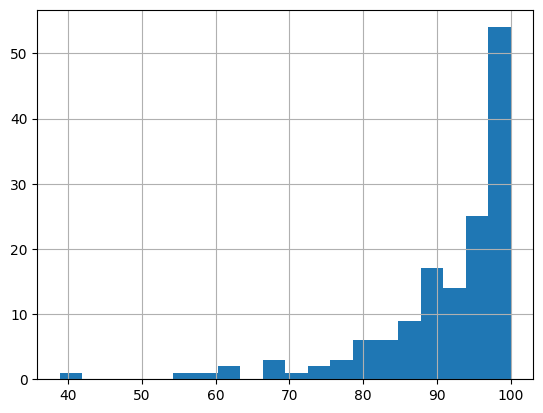

In [141]:
# graphing the distribution of average canopy cover
regression_data_2024['average_canopy_cover'].hist(bins=20)
# the data fot average canopy cover is left skewed so if any missing values present, we will use zeros

In [142]:
# checking how amny nul values average canopy cover has
regression_data_2024['average_canopy_cover'].isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2

In [143]:
# deleting uneeded columns
regression_data_2024 = regression_data_2024.drop(['Unnamed: 27', 'N', 'E', 'S', 'W', 'Canopy gap and/or downed trees present', 'Dioscorea polystachya','SUM'], axis=1)

# filling missing values for the rest of the columns with 0
regression_data_2024.fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [144]:
#creating a column 'invasive_species_sum' based on summing columns
regression_data_2024['invasive_species_sum'] = regression_data_2024.iloc[:, 5:20].sum(axis=1)
regression_data_2024.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Trimble_station,form_densiometer,average_canopy_cover,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,invasive_species_sum
0,1,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,20.0
1,2,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,0.0,1.0,1.0,0.0,...,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,15.0
2,3,2.60,97.40,"Oak, basswood, maple","Maple, ash",3.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,10.0
3,4,6.76,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",1.0,1.0,0.0,4.0,0.0,...,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,19.0
4,5,13.00,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",0.0,0.0,0.0,2.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0


In [145]:
# splitting the data into features and target variable
X = regression_data_2024.drop(['invasive_species_sum', 'average_canopy_cover', 'Canopy', 'Understory', 'Trimble_station'], axis=1)
y = regression_data_2024['average_canopy_cover']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [146]:
y.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
average_canopy_cover,
97.40,8
98.18,8
98.44,7
97.66,6
97.92,6
...,...
73.74,1
88.30,1
95.32,1


In [147]:
X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,form_densiometer,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,7.02,1.0,2.0,0.0,3.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0
1,1.82,4.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0
2,2.60,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
3,6.76,1.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0
4,13.00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,9.36,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
143,30.94,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
144,24.44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
145,36.92,3.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0


In [148]:
# split the data into test set and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [149]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 135 to 102
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   form_densiometer             117 non-null    float64
 1   Lonicera japonica            117 non-null    float64
 2   Microstegium vimineum        117 non-null    float64
 3   Euonymus alatus              117 non-null    float64
 4   Ampelopsis brevipedunculata  117 non-null    float64
 5   Morus alba                   117 non-null    float64
 6   Celastrus orbiculatus        117 non-null    float64
 7   Vinca minor                  117 non-null    float64
 8   Euonymus fortunei            117 non-null    float64
 9   Akebia quinata               117 non-null    float64
 10  Fallopia japonica            117 non-null    float64
 11  Achyranthes                  117 non-null    float64
 12  Hederea helix                117 non-null    float64
 13  L. maackii             

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [150]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 125 to 11
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   form_densiometer             30 non-null     float64
 1   Lonicera japonica            30 non-null     float64
 2   Microstegium vimineum        30 non-null     float64
 3   Euonymus alatus              30 non-null     float64
 4   Ampelopsis brevipedunculata  30 non-null     float64
 5   Morus alba                   30 non-null     float64
 6   Celastrus orbiculatus        30 non-null     float64
 7   Vinca minor                  30 non-null     float64
 8   Euonymus fortunei            30 non-null     float64
 9   Akebia quinata               30 non-null     float64
 10  Fallopia japonica            30 non-null     float64
 11  Achyranthes                  30 non-null     float64
 12  Hederea helix                30 non-null     float64
 13  L. maackii               

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [151]:
# extracting the numerical features
numerical_features = X.select_dtypes(include=['number'])

# extracting catergoircal features
categorical_features = X.select_dtypes(include=['object'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [152]:
# setting up a column transformer to use standard scaling for numerical columns and one hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features.columns),
        ('cat', OneHotEncoder(), categorical_features.columns)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:
# running the pipeline to fit the random forest regressor model
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['form_densiometer', 'Lonicera japonica', 'Microstegium vimineum',
       'Euonymus alatus', 'Ampelopsis brevipedunculata', 'Morus alba',
       'Celastrus orbiculatus', 'Vinca minor', 'Euonymus fortunei',
       'Akebia quinata', 'Fallopia japonica', 'Achyranthes', 'Hederea helix',
       'L. maackii', 'Privet/ Ligustrum', 'Ailanthus'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index([], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [154]:
# evaluating model

# creating y_pred
y_pred = pipeline.predict(X_test)

# looking at mean squared error for test
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Test): {mse}")
# looking at root mean squared error for test
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (Test): {rmse}")

# looking at mean squared error for train
train_mse = mean_squared_error(y_train, pipeline.predict(X_train))
print(f"Mean Squared Error (Training): {train_mse}")
# looking at root mean squared error for train
train_rmse = np.sqrt(train_mse)
print(f"Root Mean Squared Error (Training): {train_rmse}")

# loking at the r-sqaured value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error (Test): 173.31542762266648
Root Mean Squared Error (Test): 13.164931736346622
Mean Squared Error (Training): 17.1629917880342
Root Mean Squared Error (Training): 4.142824131921871
R-squared: 0.5772559567512886


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [155]:
# checking for overfitting
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Training Score: {train_score}")
print(f"Testing Score: {test_score}")

Training Score: 0.8924931724451892
Testing Score: 0.5772559567512886


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Based on the mean squared error of 173.32 and a root mean squared error of 13.2 for the test set, this implies that the model did not perform the best but did not do terrible. This can be supported by the r-squared value of 0.578 meaning that approximately 57.8% of the average canopy cover can be accurately explained through the explanatory variables.

## Predicting the average canopy cover using a random forest regression on the cherokee park 2021 data

In [260]:
# loading dataset
# using skiprows=1 to skip the first row of the dataset
regression_data_2021=pd.read_excel("/content/drive/MyDrive/CS 430 Group Project/olmstead_dataset.xlsx", sheet_name="2021 Cherokee Invasive Survey", skiprows=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [261]:
regression_data_2021

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Trimble\nStation,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,Lonicera japonica,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present
0,1,37,5,23,90.0,40.30,59.70,"Cherry, sassafrass, maple, hackberry, walnutash","Box elder, sugar maple saplings",2,...,0,3,0,0,0,1,3,0,0,1.0
1,2,8,4,3,5.0,5.20,94.80,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder",1,...,0,4,0,0,0,2,1,0,0,0.0
2,3,10,6,13,17.0,11.96,88.04,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye",1,...,0,4,0,0,0,2,1,0,0,0.0
3,4,6,3,8,3.0,5.20,94.80,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings",1,...,0,3,0,0,0,3,3,0,0,0.0
4,5,25,23,30,22.0,26.00,74.00,"Basswood locust red oak ash,","Buckeye, Spicebush, ash sapling",3,...,1,3,0,0,1,1,3,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,169,38,5,25,4.0,18.72,81.28,"Ash, oak, butternut hickory, sugar maple, buck...","Buckeye, cercis, black cherry, dogwood, junipe...",0,...,0,4,0,0,0,2,4,0,0,1.0
160,170,21,39,44,19.0,31.98,68.02,"Osageorange, chinkapin oak, ash, tilia, sugar ...","Hackberry, cercis, ash, oak, maple, juniper, elm",0,...,0,0,0,0,0,0,4,0,1,1.0
161,171,28,9,26,34.0,25.22,74.78,"Oak sp, ash, sycamore","Sugar maple, ash, juniper, cercis, butternut h...",4,...,0,4,0,0,0,0,2,2,0,2.0
162,172,29,39,7,11.0,22.36,77.64,"Ailanthus, cercis, buckeye, sugar maple, Cornu...","Bladdernut, juniper, lonicera, ash",2,...,0,3,0,0,0,0,4,0,2,1.0


In [262]:
# renaming columns
regression_data_2021 = regression_data_2021.rename(columns={'Trimble\nStation':'Trimble_station', 'Calculated using formula in densiometer.1':'average_canopy_cover', 'Calculated using formula in densiometer':'form_densiometer'})

# checking if cherokee was removed
regression_data_2021.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Trimble_station,N,E,S,W,form_densiometer,average_canopy_cover,Canopy,Understory,Lonicera japonica,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present
0,1,37,5,23,90.0,40.30,59.70,"Cherry, sassafrass, maple, hackberry, walnutash","Box elder, sugar maple saplings",2,...,0,3,0,0,0,1,3,0,0,1.0
1,2,8,4,3,5.0,5.20,94.80,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder",1,...,0,4,0,0,0,2,1,0,0,0.0
2,3,10,6,13,17.0,11.96,88.04,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye",1,...,0,4,0,0,0,2,1,0,0,0.0
3,4,6,3,8,3.0,5.20,94.80,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings",1,...,0,3,0,0,0,3,3,0,0,0.0
4,5,25,23,30,22.0,26.00,74.00,"Basswood locust red oak ash,","Buckeye, Spicebush, ash sapling",3,...,1,3,0,0,1,1,3,0,0,0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

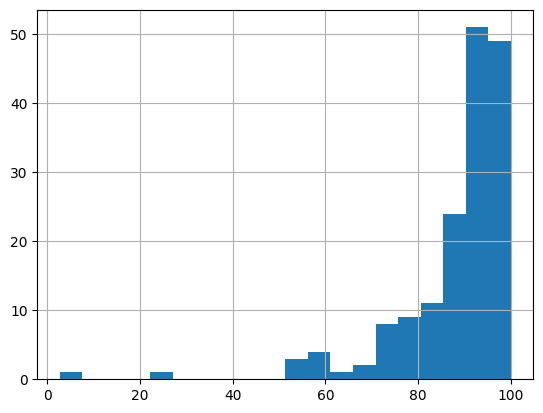

In [263]:
# graphing the distribution of average canopy cover
regression_data_2021['average_canopy_cover'].hist(bins=20)
# the data fot average canopy cover is left skewed so if any missing values present, we will use zeros

In [264]:
# checking how amny nul values average canopy cover has
regression_data_2021['average_canopy_cover'].isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [265]:
# deleting uneeded columns
regression_data_2021 = regression_data_2021.drop(['N', 'E', 'S', 'W', 'Canopy gap and/or downed trees present'], axis=1)

# filling missing values for the rest of the columns with 0
regression_data_2021.fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [266]:
#creating a column 'invasive_species_sum' based on summing columns
regression_data_2021['invasive_species_sum'] = regression_data_2021.iloc[:, 5:20].sum(axis=1)
regression_data_2021.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Trimble_station,form_densiometer,average_canopy_cover,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,invasive_species_sum
0,1,40.30,59.70,"Cherry, sassafrass, maple, hackberry, walnutash","Box elder, sugar maple saplings",2,1,0,3,1,...,0,3,0,0,0,1,3,0,0,16
1,2,5.20,94.80,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder",1,0,0,0,0,...,0,4,0,0,0,2,1,0,0,8
2,3,11.96,88.04,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye",1,0,0,0,0,...,0,4,0,0,0,2,1,0,0,8
3,4,5.20,94.80,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings",1,0,0,3,0,...,0,3,0,0,0,3,3,0,0,13
4,5,26.00,74.00,"Basswood locust red oak ash,","Buckeye, Spicebush, ash sapling",3,0,0,3,0,...,1,3,0,0,1,1,3,0,0,15


In [269]:
# splitting the data into features and target variable
X = regression_data_2021.drop(['invasive_species_sum', 'average_canopy_cover', 'Canopy', 'Understory', 'Trimble_station'], axis=1)
y = regression_data_2021['average_canopy_cover']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [270]:
# split the data into test set and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [271]:
# extracting the numerical features
numerical_features = X.select_dtypes(include=['number'])

# extracting catergoircal features
categorical_features = X.select_dtypes(include=['object'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [272]:
# setting up a column transformer to use standard scaling for numerical columns and one hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features.columns),
        ('cat', OneHotEncoder(), categorical_features.columns)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [273]:
# running the pipeline to fit the random forest regressor model
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['form_densiometer', 'Lonicera japonica', 'Microstegium vimineum',
       'Euonymus alatus', 'Ampelopsis brevipedunculata', 'Morus alba',
       'Celastrus orbiculatus', 'Vinca minor', 'Euonymus fortunei',
       'Akebia quinata', 'Fallopia japonica', 'Achyranthes', 'Hederea helix',
       'L. maackii', 'Privet/ Ligustrum', 'Ailanthus'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index([], dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [274]:
# evaluating model

# creating y_pred
y_pred = pipeline.predict(X_test)

# looking at mean squared error for test
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Test): {mse}")
# looking at root mean squared error for test
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (Test): {rmse}")

# looking at mean squared error for train
train_mse = mean_squared_error(y_train, pipeline.predict(X_train))
print(f"Mean Squared Error (Training): {train_mse}")
# looking at root mean squared error for train
train_rmse = np.sqrt(train_mse)
print(f"Root Mean Squared Error (Training): {train_rmse}")

# loking at the r-sqaured value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error (Test): 50.61176986847351
Root Mean Squared Error (Test): 7.114194955753849
Mean Squared Error (Training): 1.6656415526717674
Root Mean Squared Error (Training): 1.290597362724629
R-squared: 0.8528075479138088


In [275]:
# checking for overfitting
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Training Score: {train_score}")
print(f"Testing Score: {test_score}")

Training Score: 0.9870101857619872
Testing Score: 0.8528075479138088


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Based on the mean squared error of 50.61 and a root mean squared error of 7.11 for the test set, this implies that the model performed relatively well. This can be supported by the r-squared value of 0.8528 meaning that approximately 85.28% of the average canopy cover can be accurately explained through the explanatory variables. Overall, the model was more accurate for the 2021 data compared to the 2024 data.

# **Model 5: Random Forest Classification Model**

## Using a random forest classification model to classify the invasiveness sum for the 2024 data

In [286]:
# imports for random forest classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [320]:
# creating a copy of the regression_data_2024 called class_data
class_data = regression_data_2024.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [321]:
class_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Trimble_station,form_densiometer,average_canopy_cover,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,invasive_species_sum
0,1,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,20.0
1,2,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,0.0,1.0,1.0,0.0,...,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,15.0
2,3,2.60,97.40,"Oak, basswood, maple","Maple, ash",3.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,10.0
3,4,6.76,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",1.0,1.0,0.0,4.0,0.0,...,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,19.0
4,5,13.00,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",0.0,0.0,0.0,2.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0


In [322]:
# looking at the value counts for the invaseness sum
class_data['invasive_species_sum'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
invasive_species_sum,
10.0,16
15.0,13
12.0,12
8.0,12
11.0,11
7.0,10
4.0,10
5.0,8
9.0,7


In [323]:
# encode the values for invaseness presence sum where:
# 0 - very low
# 1 - low
# 2 - medium
# 3 - high
# 4 - very high

# if the sum value is 4 and below, encode this as 0
class_data.loc[class_data['invasive_species_sum'] <= 4, 'invasive_species_sum'] = 0

# if the sum value is between 5 and 8, encode this as 1
class_data.loc[(class_data['invasive_species_sum'] >= 5) & (class_data['invasive_species_sum'] <= 8), 'invasive_species_sum'] = 1

# if the sum value is between 9 and 12, encode this as 2
class_data.loc[(class_data['invasive_species_sum'] >= 9) & (class_data['invasive_species_sum'] <= 12), 'invasive_species_sum'] = 2

# if the sum value is between 13 and 16, encode this as 3
class_data.loc[(class_data['invasive_species_sum'] >= 13) & (class_data['invasive_species_sum'] <= 16), 'invasive_species_sum'] = 3

# if the sum value is greater than 16, encode this as 4
class_data.loc[class_data['invasive_species_sum'] > 16, 'invasive_species_sum'] = 4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [324]:
# spliting data into target and features
X = class_data.drop(['invasive_species_sum', 'Canopy', 'Understory'], axis=1)
y = class_data['invasive_species_sum']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [325]:
y

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,invasive_species_sum
0,4.0
1,3.0
2,2.0
3,4.0
4,1.0
...,...
142,1.0
143,1.0
144,2.0
145,4.0


In [326]:
# checking if data is unbalanced
y.value_counts() # y is unbalanced

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
invasive_species_sum,
2.0,46
1.0,36
3.0,31
0.0,19
4.0,15


In [327]:
# using SMOTE for y since it is unbalanced
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [328]:
# split the data into test set and train set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [329]:
# extracting the numerical features
numerical_features = X_resampled.select_dtypes(include=['number'])

# setting up a column transformer to use standard scaling for numerical columns and one hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features.columns)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=60))
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [330]:
# running the pipeline to fit the random forest classifier model
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['form_densiometer', 'average_canopy_cover', 'Lonicera japonica',
       'Microstegium vimineum', 'Euonymus alatus',
       'Ampelopsis brevipedunculata', 'Morus alba', 'Celastrus orbiculatus',
       'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
       'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii',
       'Privet/ Ligustrum', 'Ailanthus'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=60, random_state=42))])

In [331]:
# evaluating model

# creating y_pred_class
y_pred_class = pipeline.predict(X_test)

# looking at accuracy score
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred_class))

Accuracy: 0.6956521739130435
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83         6
         1.0       0.46      0.75      0.57         8
         2.0       0.56      0.38      0.45        13
         3.0       0.80      0.80      0.80        10
         4.0       1.00      0.89      0.94         9

    accuracy                           0.70        46
   macro avg       0.73      0.73      0.72        46
weighted avg       0.72      0.70      0.69        46



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


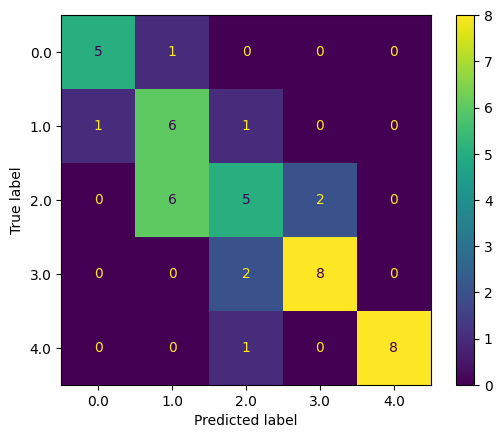

In [332]:
# plotting a confusion matrix
cm = confusion_matrix(y_test, y_pred_class, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()
plt.show()

## Using a random forest classification model to classify the invasiveness sum for the 2021 data

In [309]:
# creating a copy of the regression_data_2021 called class_data_2021
class_data_2021 = regression_data_2021.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [310]:
class_data_2021.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Trimble_station,form_densiometer,average_canopy_cover,Canopy,Understory,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,invasive_species_sum
0,1,40.30,59.70,"Cherry, sassafrass, maple, hackberry, walnutash","Box elder, sugar maple saplings",2,1,0,3,1,...,0,3,0,0,0,1,3,0,0,16
1,2,5.20,94.80,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder",1,0,0,0,0,...,0,4,0,0,0,2,1,0,0,8
2,3,11.96,88.04,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye",1,0,0,0,0,...,0,4,0,0,0,2,1,0,0,8
3,4,5.20,94.80,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings",1,0,0,3,0,...,0,3,0,0,0,3,3,0,0,13
4,5,26.00,74.00,"Basswood locust red oak ash,","Buckeye, Spicebush, ash sapling",3,0,0,3,0,...,1,3,0,0,1,1,3,0,0,15


In [311]:
# looking at the value counts for the invaseness sum
class_data_2021['invasive_species_sum'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
invasive_species_sum,
8,17
12,13
10,13
15,12
9,12
13,11
6,11
16,10
14,9


In [312]:
# encode the values for invaseness presence sum where:
# 0 - very low
# 1 - low
# 2 - medium
# 3 - high
# 4 - very high

# if the sum value is 4 and below, encode this as 0
class_data_2021.loc[class_data_2021['invasive_species_sum'] <= 4, 'invasive_species_sum'] = 0

# if the sum value is between 5 and 8, encode this as 1
class_data_2021.loc[(class_data_2021['invasive_species_sum'] >= 5) & (class_data_2021['invasive_species_sum'] <= 8), 'invasive_species_sum'] = 1

# if the sum value is between 9 and 12, encode this as 2
class_data_2021.loc[(class_data_2021['invasive_species_sum'] >= 9) & (class_data_2021['invasive_species_sum'] <= 12), 'invasive_species_sum'] = 2

# if the sum value is between 13 and 16, encode this as 3
class_data_2021.loc[(class_data_2021['invasive_species_sum'] >= 13) & (class_data_2021['invasive_species_sum'] <= 16), 'invasive_species_sum'] = 3

# if the sum value is greater than 16, encode this as 4
class_data_2021.loc[class_data_2021['invasive_species_sum'] > 16, 'invasive_species_sum'] = 4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [313]:
# spliting data into target and features
X = class_data_2021.drop(['invasive_species_sum', 'Canopy', 'Understory'], axis=1)
y = class_data_2021['invasive_species_sum']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [314]:
y

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,invasive_species_sum
0,3
1,1
2,1
3,3
4,3
...,...
159,3
160,1
161,3
162,3


In [315]:
# checking if data is unbalanced
y.value_counts() # y is unbalanced

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
invasive_species_sum,
2,46
1,45
3,42
4,19
0,12


In [316]:
# using SMOTE for y since it is unbalanced
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled2, y_resampled2 = smote.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [318]:
# split the data into test set and train set
X_train, X_test, y_train, y_test = train_test_split(X_resampled2, y_resampled2, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [333]:
# extracting the numerical features
numerical_features = X_resampled2.select_dtypes(include=['number'])

# setting up a column transformer to use standard scaling for numerical columns and one hot encoding for categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features.columns)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=60))
])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [334]:
# running the pipeline to fit the random forest classifier model
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Trimble_station', 'form_densiometer', 'average_canopy_cover',
       'Lonicera japonica', 'Microstegium vimineum', 'Euonymus alatus',
       'Ampelopsis brevipedunculata', 'Morus alba', 'Celastrus orbiculatus',
       'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
       'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii',
       'Privet/ Ligustrum', 'Ailanthus'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(n_estimators=60, random_state=42))])

In [335]:
# evaluating model

# creating y_pred_class
y_pred_class = pipeline.predict(X_test)

# looking at accuracy score
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred_class))

Accuracy: 0.717391304347826
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67         6
         1.0       0.47      0.88      0.61         8
         2.0       0.75      0.46      0.57        13
         3.0       0.89      0.80      0.84        10
         4.0       1.00      0.89      0.94         9

    accuracy                           0.72        46
   macro avg       0.75      0.74      0.73        46
weighted avg       0.77      0.72      0.72        46



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


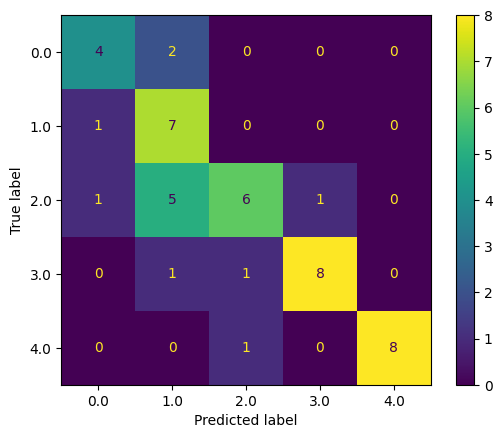

In [336]:
# plotting a confusion matrix
cm = confusion_matrix(y_test, y_pred_class, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()
plt.show()